









# Importing Libraries

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt
import plotly.plotly as py
import plotly.graph_objs as go

# Data Visualization 

In [2]:
df = pd.read_csv('input.csv')

In [3]:
df.head(2)

,objid,ra,dec,u,g,r,i,z,redshift,specobjid
0,5.877230e+17,195.012162,-1.100488,18.309752,18.169523,17.929716,18.055948,17.346815,0.307337,8.269550e+16
1,5.877230e+17,213.867707,-1.087487,19.804815,19.610514,19.032997,18.578936,17.907961,0.379570,8.550860e+16


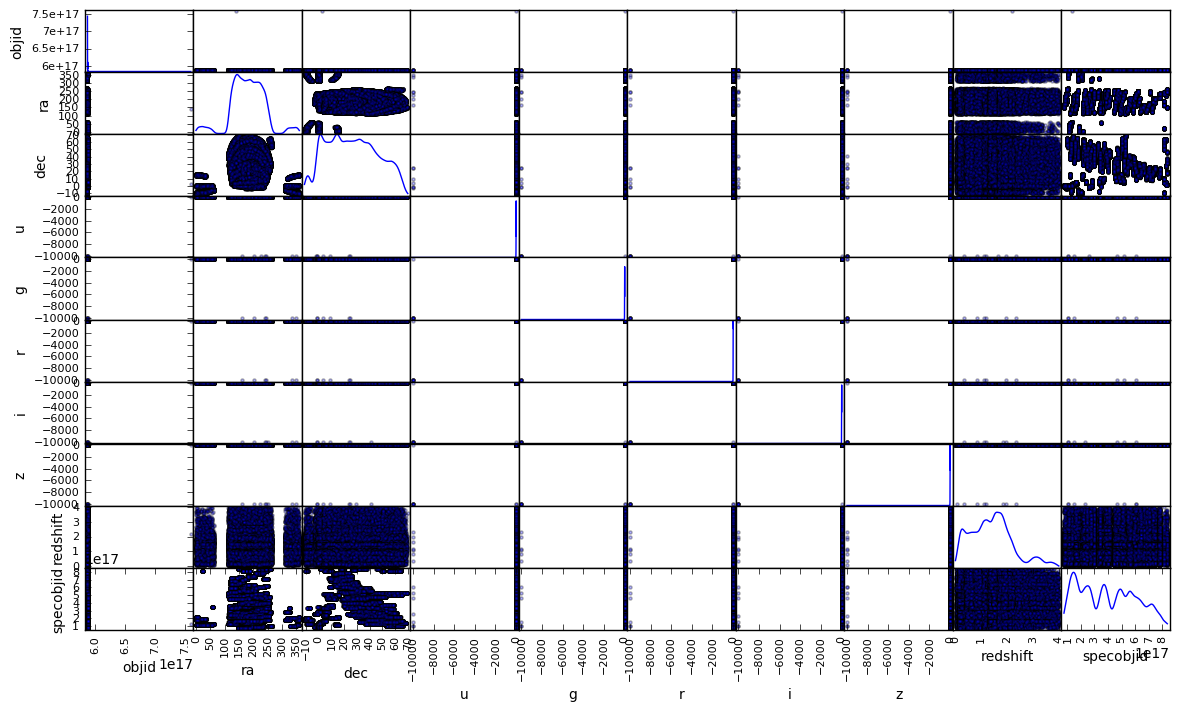

In [4]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Mapping Universe in 2D Map 

In [5]:
# convert coordinates to degrees
df['ra'] - 180
df['ra'] *= np.pi / 180
df['dec'] *= np.pi / 180

In [6]:
import plotly 
plotly.tools.set_credentials_file(username='prakritidev', api_key='mIJ0WAclUfQh8f86m84X')

import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Scattergl(
    x = df['ra'],
    y = df['dec'],
    mode = 'markers',
    marker = dict(
        line = dict(
            width = 0.5, 
            color = '#404040')
    )
)
data = [trace]
py.iplot(data, filename='WebGL100000')

In [30]:
df1 = pd.read_csv('input.csv')

In [31]:
from csv import DictReader
with open("input.csv") as f:
    RA = [row["ra"] for row in DictReader(f)]
    
with open("input.csv") as f:
    DEC = [row["dec"] for row in DictReader(f)]

In [32]:
RA = [float(x) - 180 for x in RA]
RA = [x * (np.pi / 180) for x in RA]
DEC = [float(x) * (np.pi / 180) for x in DEC]

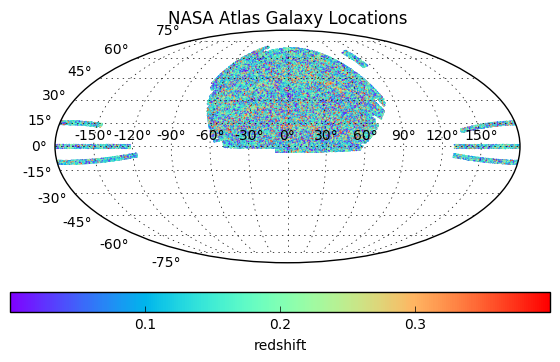

In [33]:
cNorm  = plt.matplotlib.colors.Normalize(vmin=0, vmax=3600)

ax = plt.axes(projection='mollweide')
plt.scatter(RA, DEC, s=1, c= df1['redshift']/10, cmap=plt.cm.rainbow,
            edgecolors='none', linewidths=0)
plt.grid(True)

plt.title('Galaxy Locations using Redshift')
cb = plt.colorbar(cax=plt.axes([0.05, 0.1, 0.9, 0.05]),
                  orientation='horizontal',
                  ticks=np.linspace(0, 0.5, 6))
cb.set_label('redshift')

plt.show()

In [8]:
df.drop(df.columns[[0, 1, 2]], axis=1, inplace=True)

In [9]:
target = df['redshift']

In [10]:
df.drop('redshift', axis=1, inplace=True)

In [11]:
features = df.drop('specobjid', 1)

# Splitting the data into testing and traning set

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.05, random_state=42)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


# R2 metric

In [13]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

# Mean Squared Error

In [14]:


from sklearn.metrics import mean_squared_error

def mean_metric(y_test, pred):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = mean_squared_error(y_test, pred)
    
    # Return the score
    return score

# Random Forest Model with Performance

In [15]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train,y_train)
regressor.predict(X_test)

array([ 3.114393 ,  2.056093 ,  0.6422138, ...,  1.0195878,  0.9248746,
        1.1814247])

In [16]:
score = performance_metric(y_test,regressor.predict(X_test) )
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.721.


In [17]:
score = mean_metric(y_test,regressor.predict(X_test) )
print ("Model has a Mean squared error {:.3f}.".format(score))

Model has a Mean squared error 0.198.


# Decision Tree Model and Performance

In [18]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
reg.predict(X_test)

array([ 3.22172 ,  2.06801 ,  0.588036, ...,  1.07391 ,  0.798376,
        0.891671])

In [19]:
score = performance_metric(y_test,reg.predict(X_test) )
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.500.


In [20]:
score = mean_metric(y_test,reg.predict(X_test) )
print ("Model has a Mean squared error {:.3f}.".format(score))

Model has a Mean squared error 0.355.


# Linear Regression Model and Performance

In [21]:
from sklearn.linear_model import LinearRegression
Lreg = LinearRegression()
Lreg.fit(X_train,y_train)
Lreg.predict(X_test)

array([ 1.42779932,  1.39601022,  1.35936891, ...,  1.44599013,
        1.38941853,  1.41630034])

In [22]:
score = performance_metric(y_test,Lreg.predict(X_test) )
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.003.


In [23]:
score = mean_metric(y_test,Lreg.predict(X_test) )
print ("Model has a Mean squared error {:.3f}.".format(score))

Model has a Mean squared error 0.708.
